Первый pet-проект

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mckorob","key":"9dae6fda7d9df67998e29b8f3cbbaf35"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tan5577/coffee-sales-csv
!unzip coffee-sales-csv.zip # скачиваем и распаковываем датасет

Dataset URL: https://www.kaggle.com/datasets/tan5577/coffee-sales-csv
License(s): CC0-1.0
  0% 0.00/29.6k [00:00<?, ?B/s]
100% 29.6k/29.6k [00:00<00:00, 101MB/s]
Archive:  coffee-sales-csv.zip
  inflating: Coffe_sales.csv         


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

plt.style.use('ggplot')
df = pd.read_csv('Coffe_sales.csv')


In [6]:
q3 = np.percentile(df['money'], 75)
q1 = np.percentile(df['money'], 25)
iqr = q3-q1
df = df[df['money'] <= q3+1.5*iqr]
df = df[df['money'] >= q1-1.5*iqr]
display(df)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,3/1/2024,15:50.5
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,19:22.5
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,3/1/2024,20:18.1
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,3/1/2024,46:33.0
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,3/1/2024,48:14.6
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,3/23/2025,34:54.9
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,3/23/2025,43:37.4
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,3/23/2025,44:16.9
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,3/23/2025,47:28.7


In [7]:
display(df.describe(include='all'))
# видим, что самый популярный напиток - американо с молоком, что кофе примерно с однаковой частотой берут на протяжении каждого дня и каждого месяца

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
count,3547.000000,3547,3547.000000,3547,3547,3547,3547,3547.000000,3547.000000,3547,3547
unique,NaN,1,NaN,8,3,7,12,NaN,NaN,381,3373
top,NaN,card,NaN,Americano with Milk,Afternoon,Tue,Mar,NaN,NaN,10/11/2024,55:31.6
freq,NaN,3547,NaN,809,1205,572,494,NaN,NaN,26,3
mean,14.185791,NaN,31.645216,NaN,NaN,NaN,NaN,3.845785,6.453905,NaN,NaN
std,4.234010,NaN,4.877754,NaN,NaN,NaN,NaN,1.971501,3.500754,NaN,NaN
min,6.000000,NaN,18.120000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,10.000000,NaN,27.920000,NaN,NaN,NaN,NaN,2.000000,3.000000,NaN,NaN
50%,14.000000,NaN,32.820000,NaN,NaN,NaN,NaN,4.000000,7.000000,NaN,NaN
75%,18.000000,NaN,35.760000,NaN,NaN,NaN,NaN,6.000000,10.000000,NaN,NaN


In [8]:
agg = df.groupby('coffee_name').agg(
    count = ('coffee_name', len),
    revenue = ('money', 'sum')
)
display(agg.sort_values('revenue', ascending=False))
# видим что самые прибыльные напитки это латте, американо с молоком и капучино

,count,revenue
coffee_name,,
Latte,757,26875.30
Americano with Milk,809,24751.12
Cappuccino,486,17439.14
Americano,564,14650.26
Hot Chocolate,276,9933.46
Cocoa,239,8521.16
Cortado,287,7384.86
Espresso,129,2690.28


In [9]:
agg2 = df.groupby('hour_of_day').agg(
    count = ('hour_of_day', len),
    revenue = ('money', 'sum')
)
display(agg2.sort_values('revenue', ascending=False))
# больше всего и по количеству транзакций и по выручке люди ходят в кофейню в 10

,count,revenue
hour_of_day,,
10,328,10198.52
16,278,9031.84
11,283,8453.10
19,229,7751.96
17,237,7659.76
15,236,7476.02
12,241,7419.62
9,242,7264.28
14,225,7173.80


In [10]:
bins = [6, 10, 14, 18, 22]  # границы интервалов
labels = ['6-10', '10-14', '14-18', '18-22']

df['time_interval'] = pd.cut(df['hour_of_day'], bins=bins, labels=labels, right=False)
agg3 = df.groupby('time_interval').agg(
    count = ('time_interval', len),
    revenue = ('money', 'sum')
  )
display(agg3.sort_values('revenue', ascending=False))
# на практике нам вряд-ли понадобится конкретный час - вот интервалы когда посетители приносят больше денег

/tmp/ipython-input-105162120.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg3 = df.groupby('time_interval').agg(


,count,revenue
time_interval,,
10-14,1077,33100.00
14-18,976,31341.42
18-22,811,26891.42
6-10,570,17277.58


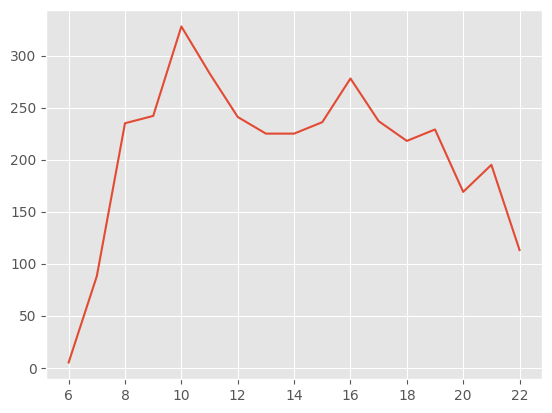

In [11]:
x = [i for i in range(6, 23)]
y = [(df['hour_of_day'] == i).sum() for i in x]
plt.plot(x, y)
# распределние по часам